# FUSION-TWAS analysis
- Prepare input expression file
- h2 filter
- Make TWAS plot

## 1: Prepare input expression file
Follow GEUVADIS example data. Regress by covariates with 50HCP. Exclude genes without cis-variants, or with 1 cis-variant (got error in compute weights step).
### Write regressed gene expression file

In [2]:
library(data.table)
library(dplyr)
library(ggplot2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
datExpr <- fread("~/project-gandalm/isoform_twas/eqtl_new/data/eur/gene.counts.scaled.normalized.bed.gz", data.table = F)

In [3]:
info <- datExpr[,1:4]

In [4]:
head(info)

,#Chr,start,end,ID
,<int>,<int>,<int>,<chr>
1,1,11868,11869,ENSG00000223972
2,1,29553,29554,ENSG00000243485
3,1,29569,29570,ENSG00000227232
4,1,36080,36081,ENSG00000237613
5,1,91104,91105,ENSG00000239945
6,1,131024,131025,ENSG00000233750


In [5]:
dim(datExpr)

[1] 31947   288

In [6]:
datExpr <- datExpr[,5:288]

In [7]:
rel <- read.table("~/project-gandalm/isoform_twas/genotype/all_data/isec_R2_greater_than_3/ancestry/related.txt", header = F, stringsAsFactors = F)$V1

In [8]:
head(datExpr)

,898,1038,1046,1102,1107,1110,1111,1115,1117,1118,⋯,RNAID1922,RNAID1936,RNAID1938,RNAID1939,RNAID1944,RNAID1952,RNAID1974,RNAID1983,RNAID1987,RNAID2144
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1.795879,3.744273,1.795879,2.491968,1.795879,4.002405,1.795879,1.795879,3.998438,1.795879,⋯,2.479985,4.050421,3.767670,4.723718,2.870747,4.006096,2.428890,3.096046,3.829952,1.683311
2,2.796174,1.739895,3.123002,2.654599,1.739895,1.739895,3.172931,1.739895,2.194677,3.136344,⋯,2.019259,3.206400,2.019259,2.944955,2.019259,2.019259,3.750081,2.019259,2.019259,2.019259
3,7.765424,8.570556,8.912628,7.413496,7.693429,8.257964,7.939207,9.635787,7.264137,8.361849,⋯,8.987175,7.911453,7.841493,9.145496,9.261393,8.844686,7.946529,8.508698,9.258142,8.935612
4,2.993636,2.993636,2.993636,4.780798,2.993636,4.387076,2.993636,2.993636,5.084152,2.993636,⋯,-0.483929,3.345497,3.251949,3.827756,4.242388,4.008510,2.645839,-0.483929,3.386612,2.969509
5,4.511053,2.157703,2.157703,2.157703,3.942954,2.157703,2.157703,3.181686,3.340957,4.843240,⋯,3.764009,1.850485,4.637136,1.850485,3.729057,3.415230,1.850485,4.114876,1.850485,4.426459
6,5.015399,4.325896,4.316580,4.264542,4.337846,4.758140,1.782114,3.659840,3.876322,4.912052,⋯,5.524361,4.056999,5.160068,6.845745,4.371984,4.196934,4.160272,5.103313,3.367350,6.495046


In [9]:
datExpr <- datExpr[,!names(datExpr) %in% rel]
dim(datExpr)

[1] 31947   280

In [10]:
cov <- read.table("~/project-gandalm/isoform_twas/eqtl_new/data/eur/50HCP_cov.txt", header = T, stringsAsFactors = F, check.names = F)

In [11]:
head(cov)

,id,898,1038,1046,1102,1107,1110,1111,1115,1117,⋯,RNAID1922,RNAID1936,RNAID1938,RNAID1939,RNAID1944,RNAID1952,RNAID1974,RNAID1983,RNAID1987,RNAID2144
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,PC1,-0.00895342,-0.00876532,-0.00886473,-0.00853766,-0.00728483,-0.0085298,-0.00767994,-0.00878768,-0.0141626,⋯,-0.0115352,0.0154756,-0.0140697,-0.0124017,-0.0116278,-0.0112696,-0.0128137,-0.0125878,-0.0127816,-0.0121041
2,PC2,-0.020861,-0.021402,-0.0215634,-0.0206188,-0.020501,-0.0208467,-0.0206434,-0.0210645,-0.0214087,⋯,-0.0152795,-0.0106044,-0.0206599,-0.0168367,-0.0140172,-0.0119532,-0.0196731,-0.0165026,-0.0124385,-0.0157224
3,PC3,0.0131582,0.0135121,0.0128837,0.0126211,0.0125649,0.0125961,0.0128211,0.0123994,0.00723602,⋯,-0.00950417,0.00488306,0.00694735,0.0021519,0.0102596,0.00991078,0.00359194,0.00828654,0.0109352,0.00926182
4,PC4,0.0192979,0.0199749,0.0197987,0.0199913,0.0187359,0.0194312,0.0204932,0.0198501,0.00786276,⋯,0.00246145,0.00349381,0.00688053,0.00330154,-0.00788228,-0.00469761,0.00642687,-0.000235182,-0.00763444,-0.00200263
5,PC5,0.0873849,0.0884509,0.0857845,0.0884136,0.0881097,0.0890663,0.0876953,0.0876118,-0.0168338,⋯,-0.0173229,-0.00890469,-0.0179644,-0.0152379,-0.0125848,-0.012658,-0.0176661,-0.014667,-0.0128655,-0.0158602
6,sex,F,M,F,F,M,M,M,F,M,⋯,F,M,M,M,F,F,M,F,M,F


In [12]:
rownames(cov) <- cov$id
cov <- cov[,-1]
cov <- cov[,!names(cov) %in% rel]
dim(cov)

[1]  57 280

In [13]:
cov[cov=="F"] <- 0
cov[cov=="M"] <- 1

In [14]:
cov <- t(cov)
cov <- cbind(1, cov)
storage.mode(cov) <- "numeric"

Y <- as.matrix(datExpr)
X <- as.matrix(cov)

beta <- (solve(t(X)%*%X)%*%t(X))%*%t(Y)
datExpr_regressed <- Y - t(X[,-1]  %*% beta[-1,])

In [16]:
dat <- cbind(info, datExpr_regressed)
dat$end <- dat$ID
colnames(dat)[1:4] <- c("Chr","Coord","TargetID","Gene_Symbol")

In [17]:
head(dat)

,Chr,Coord,TargetID,Gene_Symbol,898,1038,1046,1102,1107,1110,⋯,RNAID1922,RNAID1936,RNAID1938,RNAID1939,RNAID1944,RNAID1952,RNAID1974,RNAID1983,RNAID1987,RNAID2144
,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,11868,ENSG00000223972,ENSG00000223972,2.565564,3.6053417,1.8360737,1.9991702,1.904191,3.5480882,⋯,2.132243,3.3003805,3.177607,3.5299871,2.848982,4.073260,2.0589195,3.457027,2.875230,2.002251
2,1,29553,ENSG00000243485,ENSG00000243485,2.819398,1.0959469,2.8483054,2.1622183,1.571914,1.7570492,⋯,1.433819,2.6111706,1.270131,3.1224558,1.802944,1.197524,3.4933517,1.986875,2.338058,2.558506
3,1,29569,ENSG00000227232,ENSG00000227232,8.340482,8.7758971,9.3344082,8.3531372,8.590556,8.7678620,⋯,8.770681,8.2024261,7.868934,8.7785143,8.892686,8.820818,8.2291373,9.059215,8.577134,8.435131
4,1,36080,ENSG00000237613,ENSG00000237613,3.901713,3.1812980,3.1201478,4.1157479,3.414270,4.7278982,⋯,0.557910,3.9508007,2.696453,3.7811057,4.542311,4.005088,2.7271515,1.380424,3.161670,4.537650
5,1,91104,ENSG00000239945,ENSG00000239945,1.720500,0.5282807,0.5575717,0.6424397,1.850878,-0.2967324,⋯,1.929382,-0.4598936,2.152505,0.9581094,1.473670,1.593463,0.6791255,0.365894,0.664181,1.591270
6,1,131024,ENSG00000233750,ENSG00000233750,5.220183,4.4191885,3.8402640,4.3866399,5.164541,4.8757581,⋯,4.957508,4.0326060,4.023465,4.7190258,4.536816,3.629671,4.2418672,4.279393,4.052386,4.469380


In [18]:
dat2 <- dat[,c(3,4,1,2,5:284)]

### Write ID file
Note FID is IID, not 0. BIM file is like that.

In [20]:
ID <- data.frame(colnames(dat2)[5:284], colnames(dat2)[5:284])
head(ID)

,colnames.dat2..5.284.,colnames.dat2..5.284..1
,<fct>,<fct>
1,898,898
2,1038,1038
3,1046,1046
4,1102,1102
5,1107,1107
6,1110,1110


In [21]:
dim(ID)

[1] 280   2

In [22]:
write.table(ID, "~/project-gandalm/isoform_twas/TWAS/data/eur_gene_exp_regressed_50hcp.txt.ID",col.names=F,row.names=F,quote=F,sep="\t")

### Exclude genes with 0 or 1 cis SNP

In [23]:
results <- fread("~/project-gandalm/isoform_twas/eqtl_new/results/eur_perm_50HCP/all.chunks.txt.gz", data.table = F)

In [24]:
head(results)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,ENSG00000258162,4612,1.04861,333.576,187.095,rs78137570,-462596,5.02003e-04,0.413173,0.3376050,0.3438780
2,ENSG00000258375,4456,1.03033,342.241,190.041,chr12:80760341,-786109,3.23276e-05,-0.623449,0.0349965,0.0349460
3,ENSG00000139220,4531,1.11112,303.154,183.695,rs78526305,752586,6.98783e-04,-0.376178,0.4183030,0.4026780
4,ENSG00000127720,4819,1.03037,484.637,198.684,chr12:81948126,-410402,2.97313e-03,-0.177696,0.8961500,0.9005920
5,ENSG00000133773,4821,1.02693,449.459,194.573,rs6539689,423933,4.45367e-05,0.155920,0.0502950,0.0511853
6,ENSG00000257875,5067,1.01495,540.109,200.529,rs140545114,-96298,1.07299e-03,-1.003460,0.6287690,0.6234230


In [25]:
dim(results)

[1] 31947    11

In [26]:
sum(results$V2%in%c(0,1))

[1] 417

In [28]:
results <- results %>% filter(V2 > 1)
dim(results)

[1] 31530    11

In [29]:
dat2 <- dat2 %>% filter(TargetID %in% results$V1)

In [30]:
dim(dat2)

[1] 31530   284

In [31]:
write.table(dat2, "~/project-gandalm/isoform_twas/TWAS/data/eur_gene_exp_regressed_50hcp.txt",col.names=T,row.names=F,quote=F,sep="\t")

## 2: h2

In [18]:
hsq <- fread("~/project-gandalm/isoform_twas/TWAS/results/gene_eur/hsq/concat_hsq.txt", data.table = F)

In [19]:
head(hsq)
dim(hsq)

,V1,V2,V3,V4
,<chr>,<dbl>,<dbl>,<dbl>
1,WEIGHTS/ENSG00000104043,-0.026060,0.018928,0.183120
2,WEIGHTS/ENSG00000241175,0.010040,0.034772,0.380330
3,WEIGHTS/ENSG00000140287,-0.037906,0.010132,0.055815
4,WEIGHTS/ENSG00000271819,-0.033599,0.012303,0.066619
5,WEIGHTS/ENSG00000285410,0.554200,0.076861,0.000000
6,WEIGHTS/ENSG00000244879,0.608910,0.067364,0.000000


[1] 31530     4

In [20]:
# NAs are GCTA not converging, skipping those features
dim(hsq[complete.cases(hsq),])

[1] 30016     4

In [21]:
hsq <- hsq %>% filter(complete.cases(hsq))

In [22]:
colnames(hsq) <- c("gene","h2","se","pval")

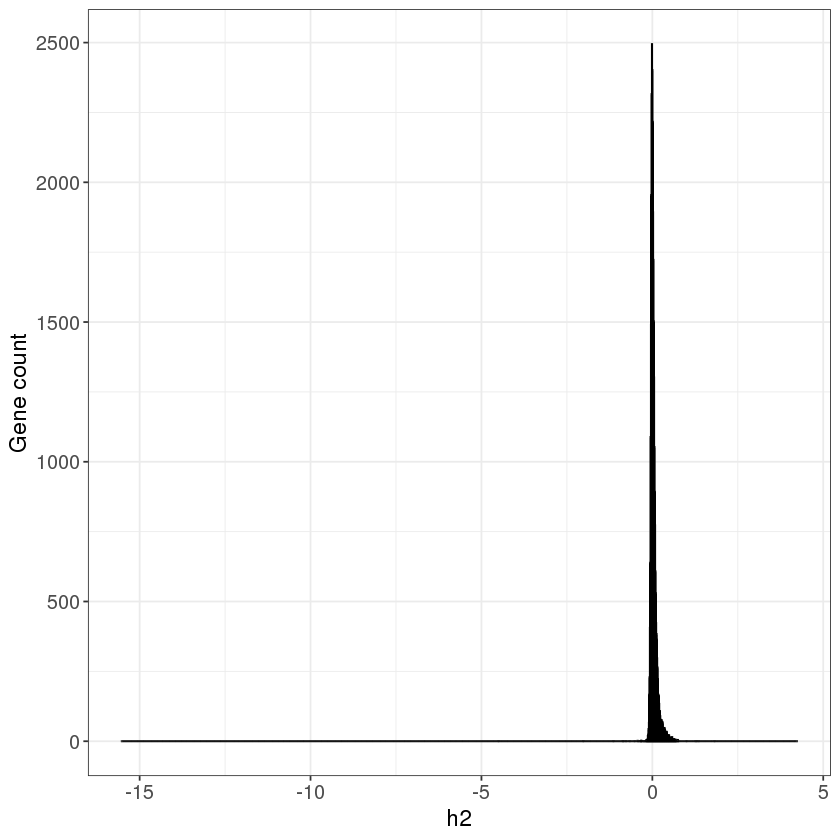

In [8]:
p <- ggplot(hsq, aes(x=h2)) +
    geom_histogram(binwidth=0.01, color="black", fill="white") +
    theme_bw() +
    labs(x="h2", y="Gene count") +
    theme(axis.text = element_text(size=12),
          axis.title = element_text(size=14))
p

In [23]:
# sig pval, positive h2 gene list
sig <- hsq %>% filter(pval < .05, h2 > 0) %>% select(gene)

In [24]:
dim(sig)

[1] 5481    1

In [25]:
hsq_sig <- hsq %>% filter(gene %in% sig$gene)

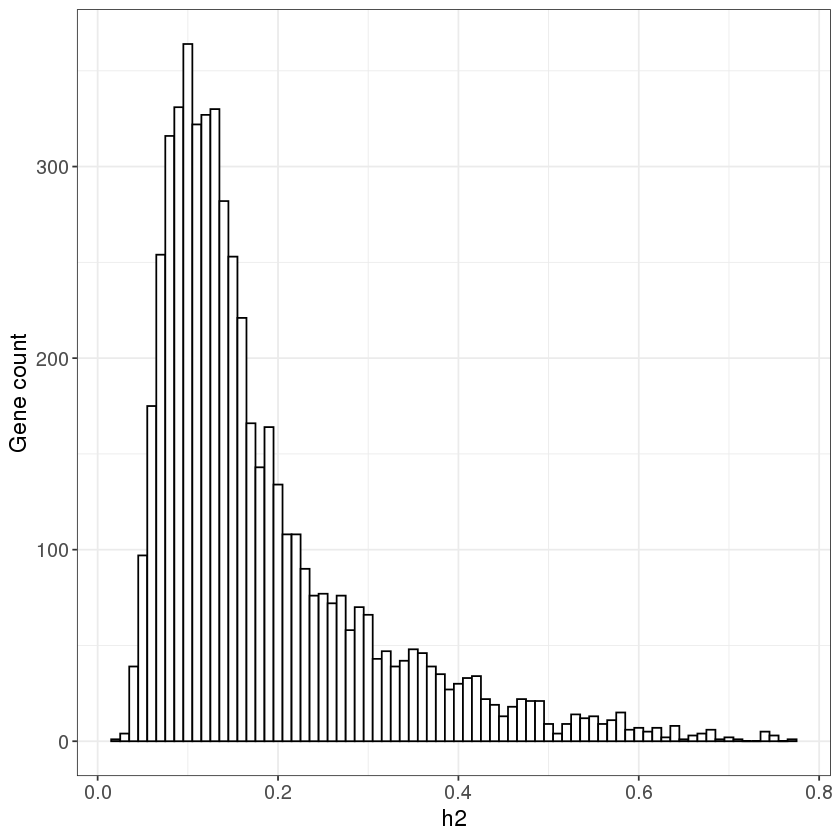

In [12]:
p2 <- ggplot(hsq_sig, aes(x=h2)) +
    geom_histogram(binwidth=0.01, color="black", fill="white") +
    theme_bw()+
    labs(x="h2", y="Gene count") +
    theme(axis.text = element_text(size=12),
          axis.title = element_text(size=14))
p2

In [26]:
head(sig)

,gene
,<chr>
1,WEIGHTS/ENSG00000285410
2,WEIGHTS/ENSG00000244879
3,WEIGHTS/ENSG00000242737
4,WEIGHTS/ENSG00000273674
5,WEIGHTS/ENSG00000183578
6,WEIGHTS/ENSG00000186417


In [27]:
sig$gene <- gsub('WEIGHTS/','',sig$gene)
head(sig)
write.table(sig, "~/project-gandalm/isoform_twas/TWAS/results/gene_eur/hsq/sigificant_positive_h2.txt", col.names=F, row.names=F, quote=F, sep="\t")

,gene
,<chr>
1,ENSG00000285410
2,ENSG00000244879
3,ENSG00000242737
4,ENSG00000273674
5,ENSG00000183578
6,ENSG00000186417


Write WGTLIST file for sig, positive h2 genes.

In [28]:
sig$gene <- gsub("^", "/u/project/gandalm/cindywen/isoform_twas/TWAS/results/gene_eur/WEIGHTS/", sig$gene)
sig$gene <- gsub("$", ".wgt.RDat", sig$gene)
head(sig)

,gene
,<chr>
1,/u/project/gandalm/cindywen/isoform_twas/TWAS/results/gene_eur/WEIGHTS/ENSG00000285410.wgt.RDat
2,/u/project/gandalm/cindywen/isoform_twas/TWAS/results/gene_eur/WEIGHTS/ENSG00000244879.wgt.RDat
3,/u/project/gandalm/cindywen/isoform_twas/TWAS/results/gene_eur/WEIGHTS/ENSG00000242737.wgt.RDat
4,/u/project/gandalm/cindywen/isoform_twas/TWAS/results/gene_eur/WEIGHTS/ENSG00000273674.wgt.RDat
5,/u/project/gandalm/cindywen/isoform_twas/TWAS/results/gene_eur/WEIGHTS/ENSG00000183578.wgt.RDat
6,/u/project/gandalm/cindywen/isoform_twas/TWAS/results/gene_eur/WEIGHTS/ENSG00000186417.wgt.RDat


In [29]:
write.table(sig, "/u/project/gandalm/cindywen/isoform_twas/TWAS/results/gene_eur/WGTLIST.txt", col.names=F, row.names=F,quote=F,sep="\t")

## 3: Association plot
Adapted from https://github.com/opain/TWAS-plotter/blob/master/TWAS-plotter.V1.0.r

In [1]:
library(ggrepel)

Loading required package: ggplot2



### 3-1. load TWAS assoc results, all chr
5481 sig pval, positive h2 gene; 104 in chr6 MHC

In [4]:
dat <- fread("~/project-gandalm/isoform_twas/TWAS/results/gene_eur/assoc/PGC.SCZ.all.chr", data.table = F)
dim(dat)
dat <- dat[order(dat$CHR, dat$P0), ]
dat <- dat %>% filter(!is.na(TWAS.P))
head(dat)
dim(dat)

[1] 5377   20

,PANEL,FILE,ID,CHR,P0,P1,HSQ,BEST.GWAS.ID,BEST.GWAS.Z,EQTL.ID,EQTL.R2,EQTL.Z,EQTL.GWAS.Z,NSNP,NWGT,MODEL,MODELCV.R2,MODELCV.PV,TWAS.Z,TWAS.P
,<lgl>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,NA,/u/project/gandalm/cindywen/isoform_twas/TWAS/results/gene_eur/WEIGHTS/ENSG00000269896.wgt.RDat,AL513477.1,1,2280000,2280000,0.1930,rs4648845,6.86,chr1:2367872,0.11000,-5.72,0.7972,3937,3937,susie,0.093200,1.13e-07,-0.739304,0.46000
2,NA,/u/project/gandalm/cindywen/isoform_twas/TWAS/results/gene_eur/WEIGHTS/ENSG00000272420.wgt.RDat,AL513477.2,1,2300000,2300000,0.1976,rs4648845,6.86,rs10910055,0.04830,5.80,0.9400,3953,15,enet,0.088600,2.34e-07,0.994042,0.32000
3,NA,/u/project/gandalm/cindywen/isoform_twas/TWAS/results/gene_eur/WEIGHTS/ENSG00000215912.wgt.RDat,TTC34,1,2720000,2720000,0.1163,rs4648845,6.86,rs78506337,0.03630,4.86,3.0900,4300,4300,susie,0.042200,3.19e-04,2.971505,0.00296
4,NA,/u/project/gandalm/cindywen/isoform_twas/TWAS/results/gene_eur/WEIGHTS/ENSG00000142611.wgt.RDat,PRDM16,1,2990000,2990000,0.1172,rs4648845,6.86,rs144128055,-0.00360,3.37,-0.4403,4218,4218,susie,-0.000579,3.61e-01,0.208604,0.83500
5,NA,/u/project/gandalm/cindywen/isoform_twas/TWAS/results/gene_eur/WEIGHTS/ENSG00000130762.wgt.RDat,ARHGEF16,1,3370000,3370000,0.2858,rs4648845,6.86,rs4648389,0.01460,4.52,0.3650,4573,58,enet,0.030500,1.95e-03,-0.766554,0.44300
6,NA,/u/project/gandalm/cindywen/isoform_twas/TWAS/results/gene_eur/WEIGHTS/ENSG00000162591.wgt.RDat,MEGF6,1,3530000,3530000,0.2389,rs7518852,4.74,rs12743246,0.00556,-4.40,1.7950,4933,71,enet,0.031300,1.73e-03,-0.482676,0.62900


[1] 5071   20

In [5]:
sig <- fread("~/project-gandalm/isoform_twas/TWAS/results/gene_eur/assoc/PGC.SCZ.all.chr.sig", data.table = F)

In [6]:
head(sig)

,PANEL,FILE,ID,CHR,P0,P1,HSQ,BEST.GWAS.ID,BEST.GWAS.Z,EQTL.ID,EQTL.R2,EQTL.Z,EQTL.GWAS.Z,NSNP,NWGT,MODEL,MODELCV.R2,MODELCV.PV,TWAS.Z,TWAS.P
,<lgl>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,NA,/u/project/gandalm/cindywen/isoform_twas/TWAS/results/gene_eur/WEIGHTS/ENSG00000214435.wgt.RDat,AS3MT,10,1.05e+08,1.05e+08,0.1072,rs11191582,-8.59,rs11191424,0.02040,-4.46,-8.117,2712,2712,susie,0.035500,8.94e-04,7.08766,1.36e-12
2,NA,/u/project/gandalm/cindywen/isoform_twas/TWAS/results/gene_eur/WEIGHTS/ENSG00000273485.wgt.RDat,AL139339.2,10,1.05e+08,1.05e+08,0.0649,rs11191582,-8.59,rs11191355,-0.00355,-3.82,-4.411,3021,3021,susie,0.001190,2.49e-01,8.35389,6.60e-17
3,NA,/u/project/gandalm/cindywen/isoform_twas/TWAS/results/gene_eur/WEIGHTS/ENSG00000254532.wgt.RDat,AL358944.1,11,3.03e+07,3.03e+07,0.3788,rs140000637,-5.45,rs12800124,0.32500,9.70,4.677,3149,3149,susie,0.332946,1.80e-26,4.69256,2.70e-06
4,NA,/u/project/gandalm/cindywen/isoform_twas/TWAS/results/gene_eur/WEIGHTS/ENSG00000152219.wgt.RDat,ARL14EP,11,3.03e+07,3.03e+07,0.2006,rs140000637,-5.45,rs7108615,0.19800,-7.73,-5.192,3149,3149,susie,0.200480,1.98e-15,5.08040,3.77e-07
5,NA,/u/project/gandalm/cindywen/isoform_twas/TWAS/results/gene_eur/WEIGHTS/ENSG00000175220.wgt.RDat,ARHGAP1,11,4.67e+07,4.67e+07,0.0641,rs7951870,7.29,rs3136505,0.02880,-4.53,2.727,2109,2109,susie,-0.001332,4.28e-01,-5.13006,2.90e-07
6,NA,/u/project/gandalm/cindywen/isoform_twas/TWAS/results/gene_eur/WEIGHTS/ENSG00000273003.wgt.RDat,ARL2-SNX15,11,6.48e+07,6.48e+07,0.0814,rs58950470,5.61,rs58568715,-0.00336,-3.37,3.455,2330,2330,susie,-0.001876,4.90e-01,-5.24143,1.59e-07


In [7]:
dim(sig)

[1] 96 20

### 3-2. get coordinates in genome

In [8]:
ticks <- NULL
lastbase <- 0
dat$pos <- NA

for (i in unique(dat$CHR)) {
  if (i==1) {
    dat[dat$CHR==i, ]$pos <- dat[dat$CHR==i, ]$P0
  }	else {
    lastbase <- lastbase + tail(subset(dat,CHR==i-1)$P0, 1)
    dat[dat$CHR==i, ]$pos <- dat[dat$CHR==i, ]$P0 + lastbase
  }
  ticks <- c(ticks, dat[dat$CHR==i, ]$pos[floor(length(dat[dat$CHR==i, ]$pos)/2)+1])
}
ticklim <- c(min(dat$pos), max(dat$pos))

sig2 <- dat %>% filter(ID %in% sig$ID)
sig2 <- sig2 %>% filter(!duplicated(ID))

In [9]:
dim(sig2)

[1] 96 21

### 3-3. Z-score plot

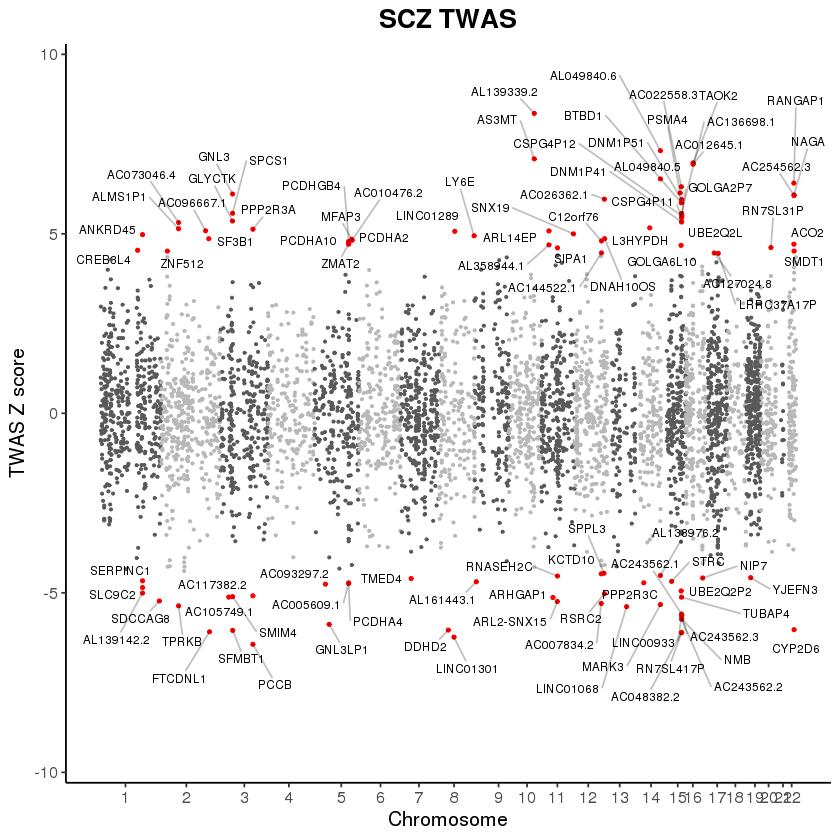

In [11]:
chr_labs <- as.character(unique(dat$CHR))
ylimit <- max(abs(dat$TWAS.Z)) + 1

p <- ggplot(dat, aes(x=pos, y=TWAS.Z, colour=factor(CHR))) +
  geom_point(size = 0.5) +
  scale_x_continuous(name="Chromosome", labels=chr_labs, breaks=ticks) +
  scale_y_continuous(name="TWAS Z score", limits=c(-ylimit, ylimit)) +
  scale_colour_manual(values=rep(c("gray35","gray72"),60), guide=FALSE) +
  geom_point(data=sig2, aes(x=pos, y=TWAS.Z), colour="red", fill="red", size=0.8) +
  geom_text_repel(data=sig2, aes(x=pos, y=TWAS.Z, label=ID), colour="black", nudge_y=ifelse(sig2$TWAS.Z > 0, .5, -.5), size=2.5, force=5, segment.alpha=0.25) +
  theme_classic() +
  labs(title = "SCZ TWAS") +
  theme(axis.text = element_text(size=10),
        axis.title = element_text(size=12),
        plot.title = element_text(size=16, face="bold", hjust = 0.5),
        plot.subtitle = element_text(size=14, hjust = 0.5))

p

In [12]:
ggsave("~/project-gandalm/isoform_twas/TWAS/figures/assoc.png", p, width =10, height = 4)